Shape of dataset: (1025, 14)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

--- Summary Statistics ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



--- First 5 Rows ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Removed 723 duplicate rows.

Unique values in categorical columns:
sex: [1 0]
cp: [0 1 2 3]
fbs: [0 1]
restecg: [1 0 2]
exang: [0 1]


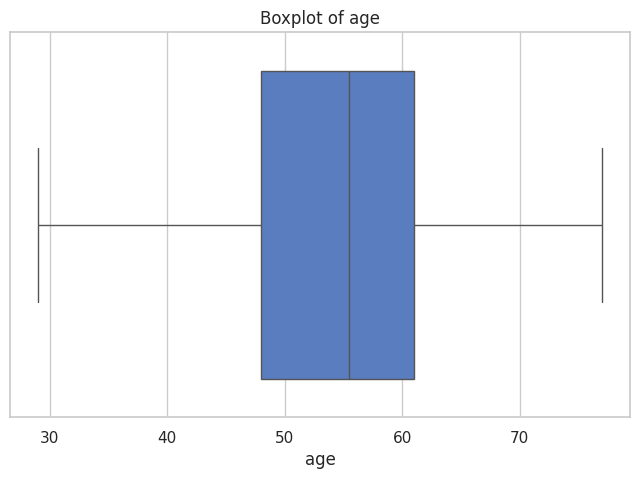

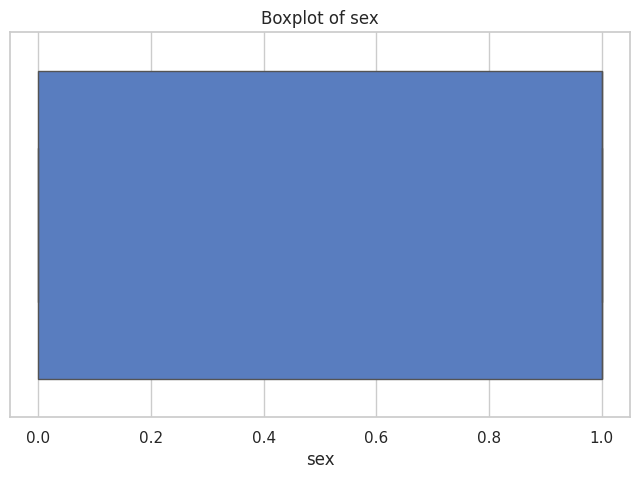

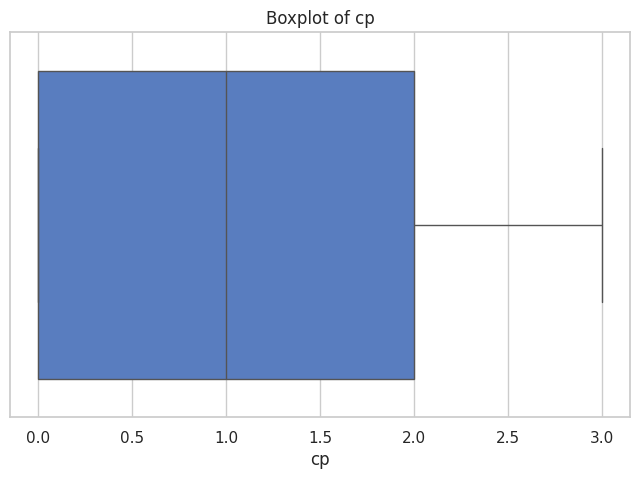

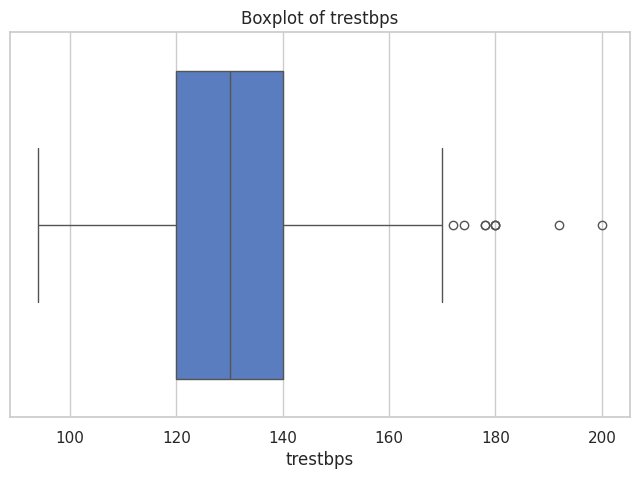

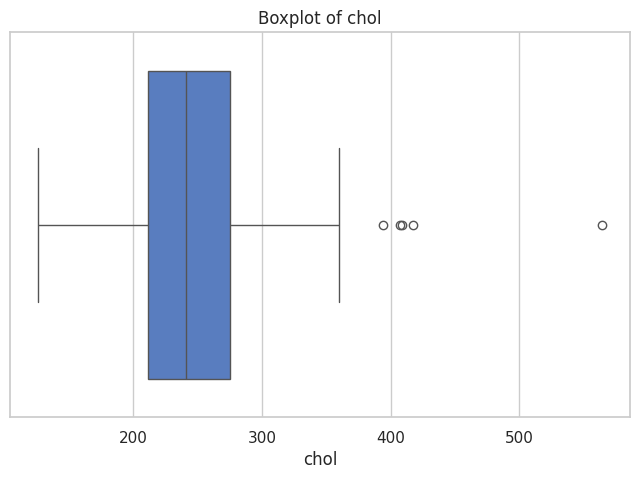

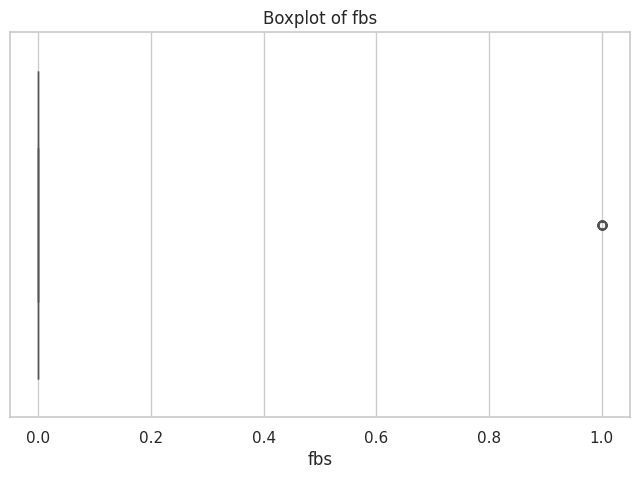

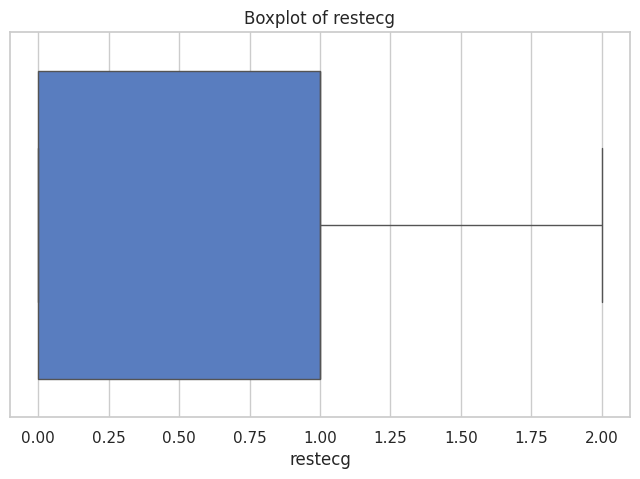

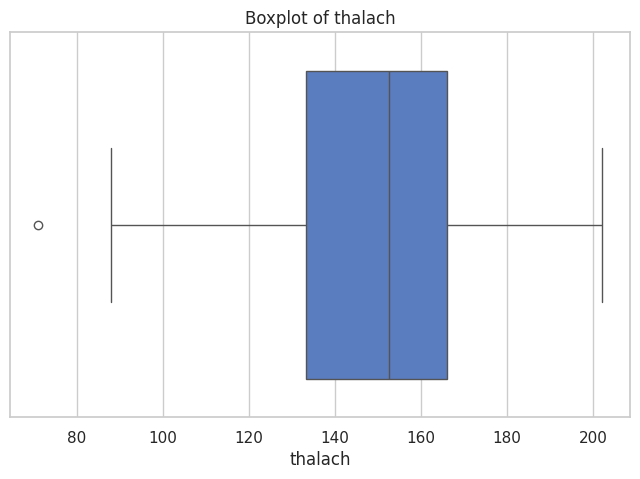

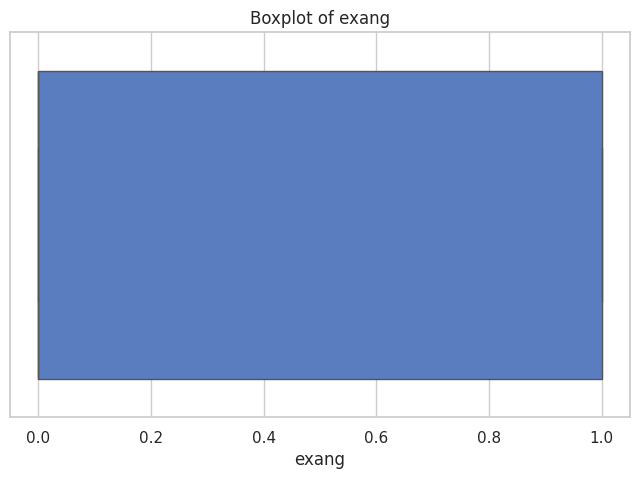

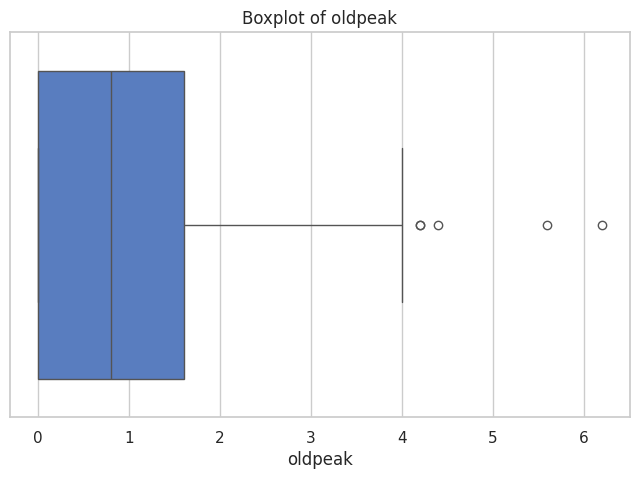

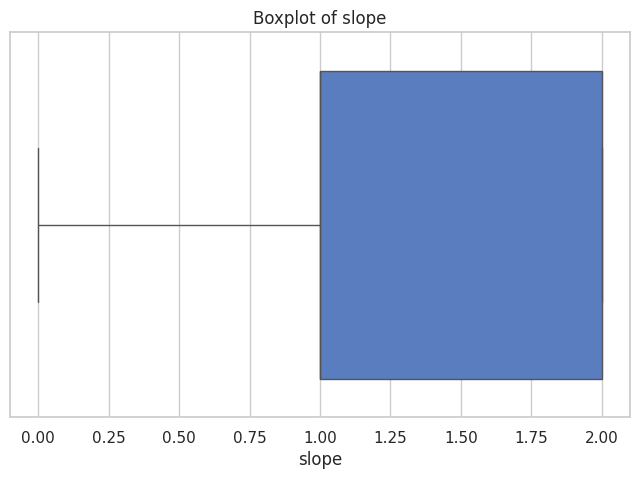

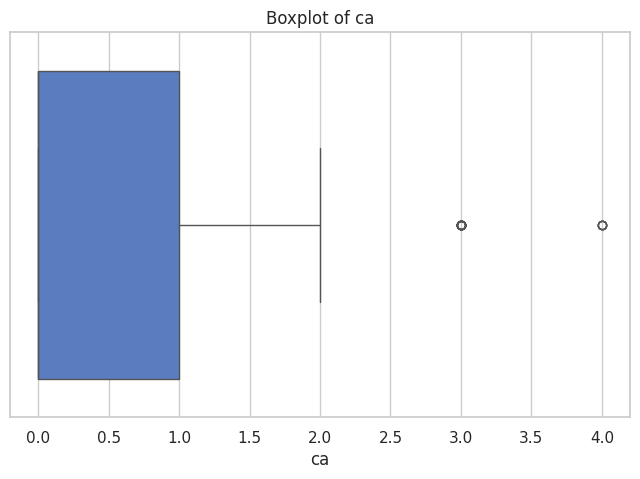

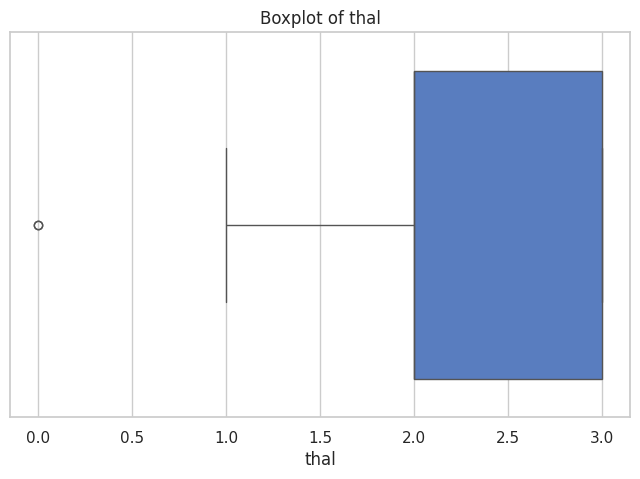

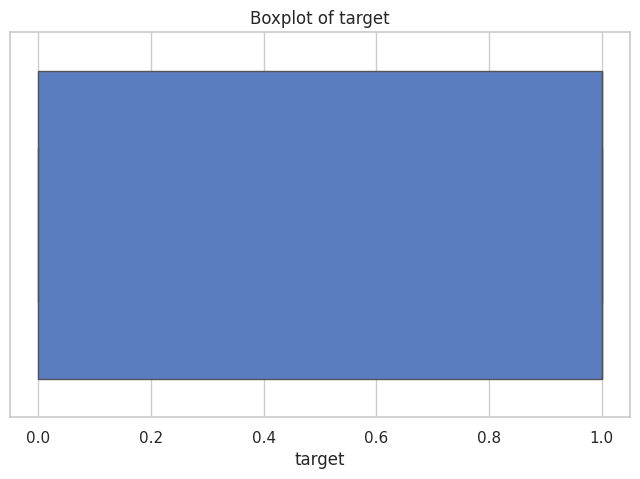

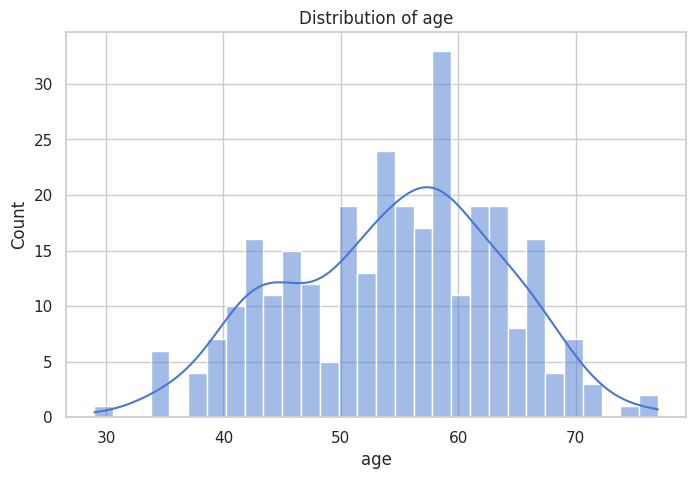

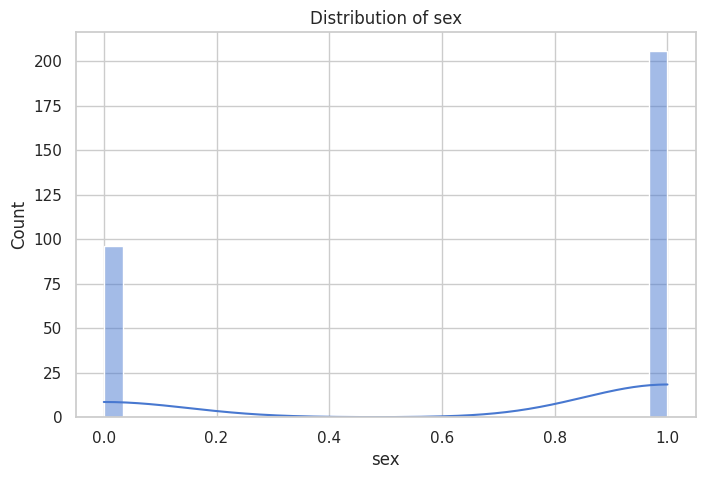

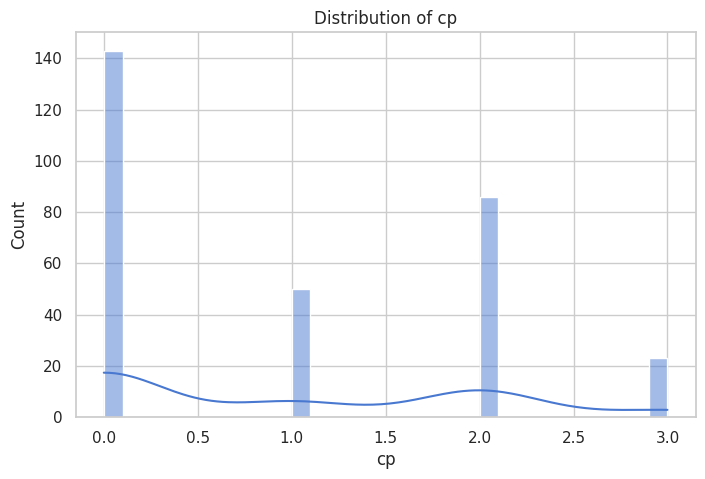

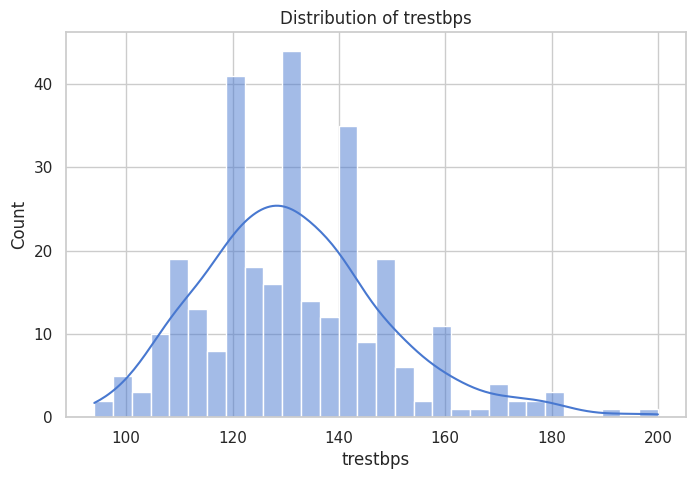

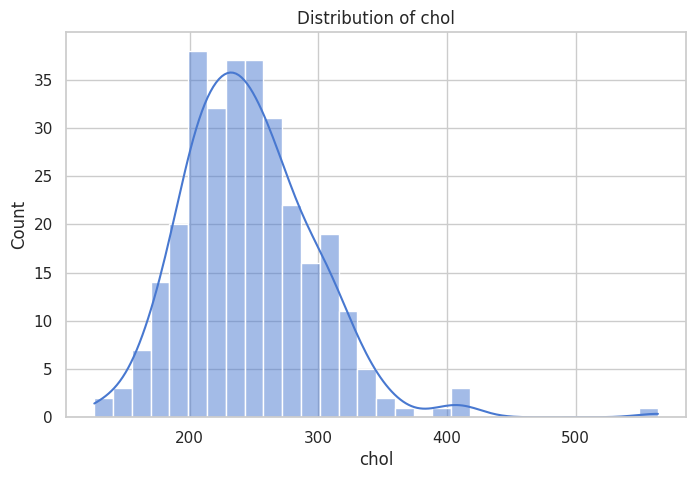

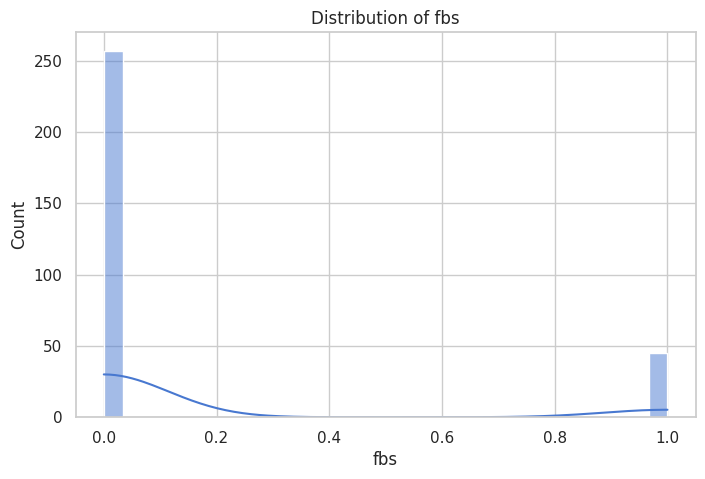

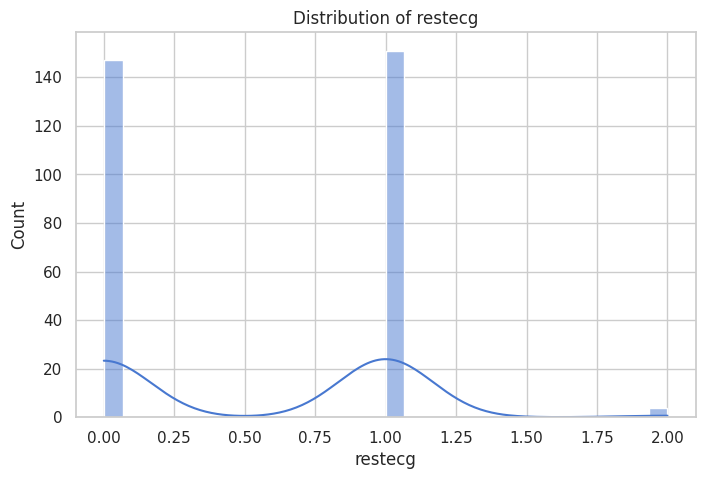

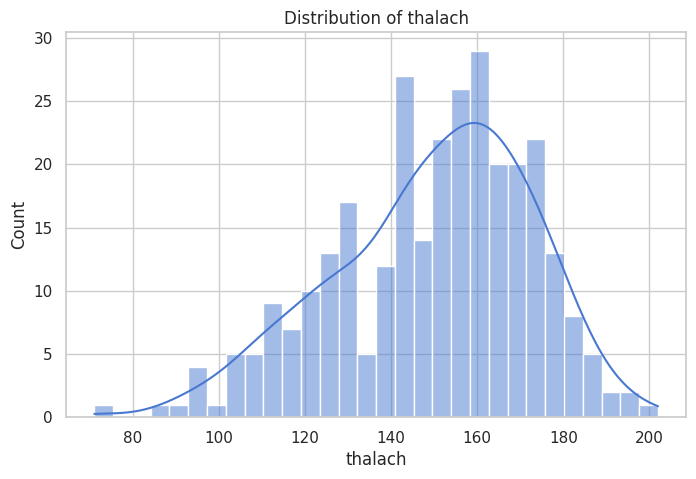

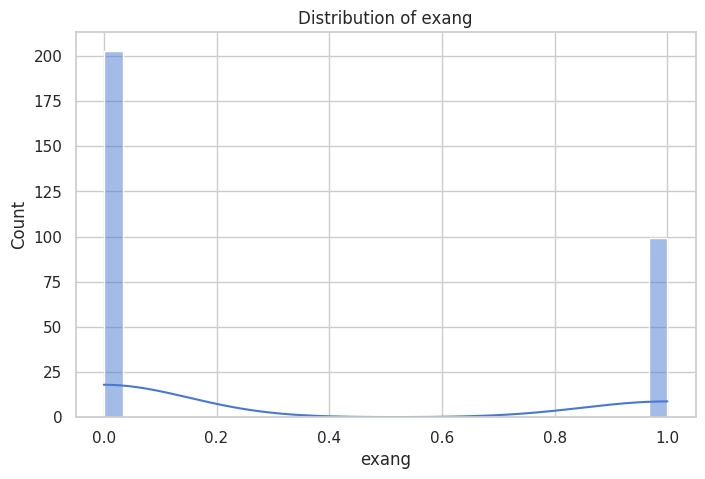

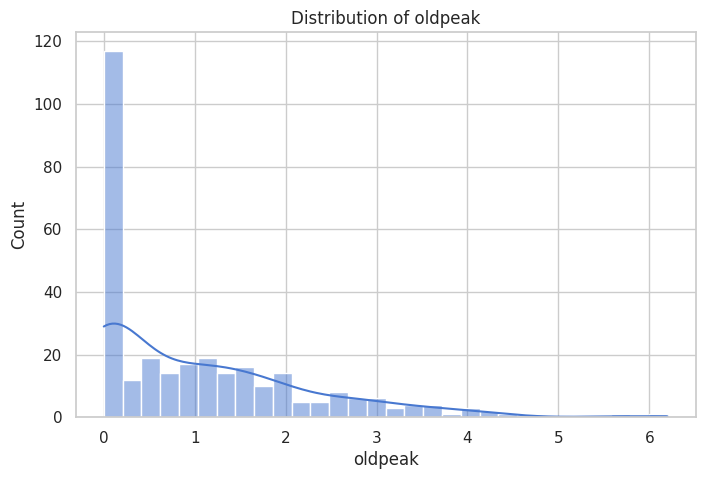

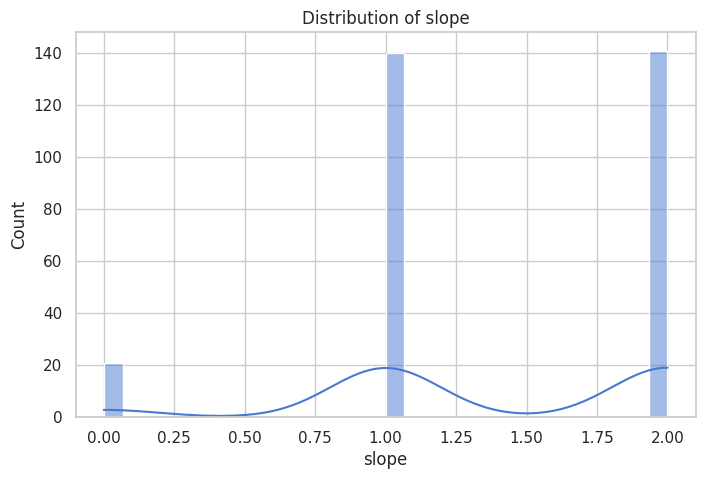

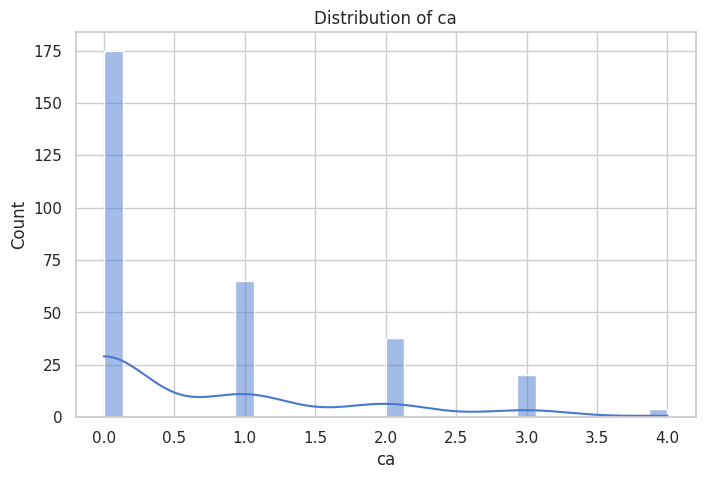

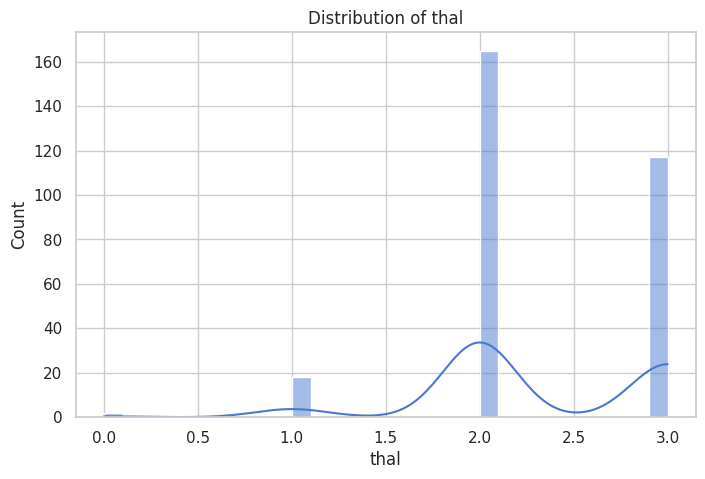

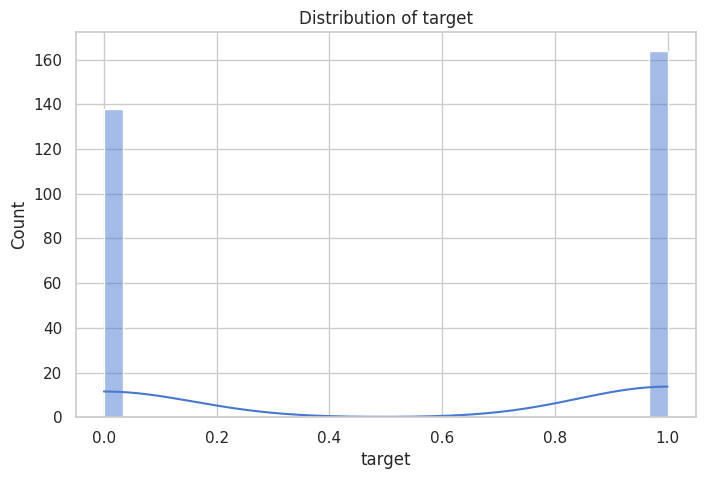

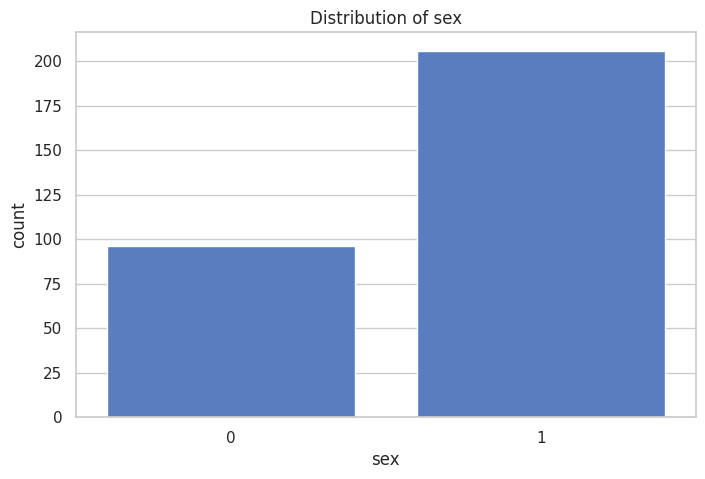

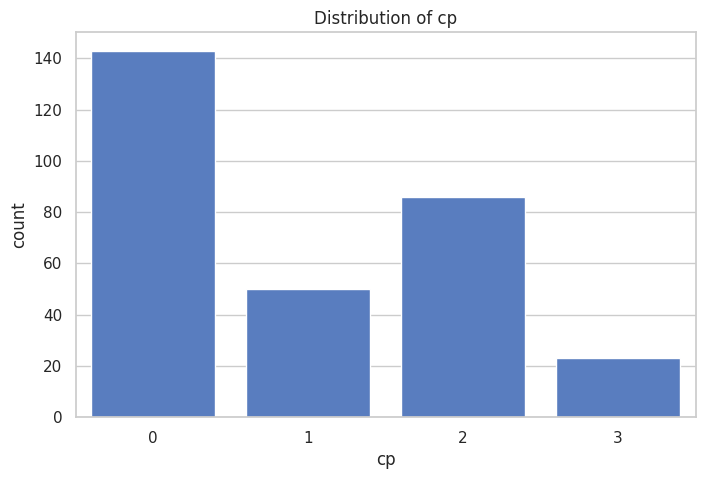

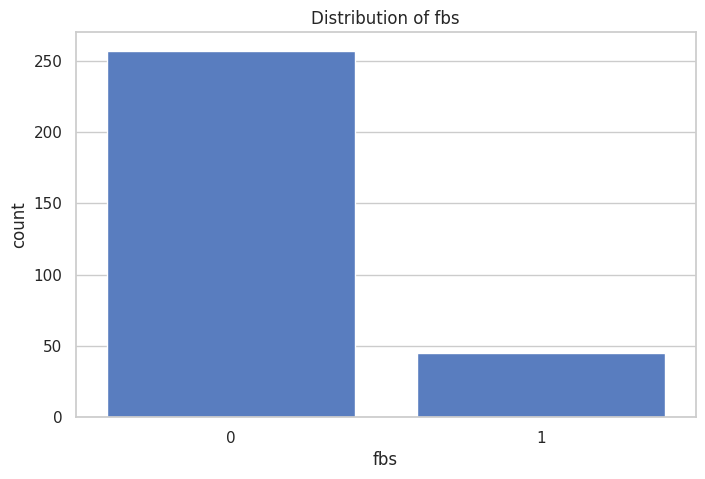

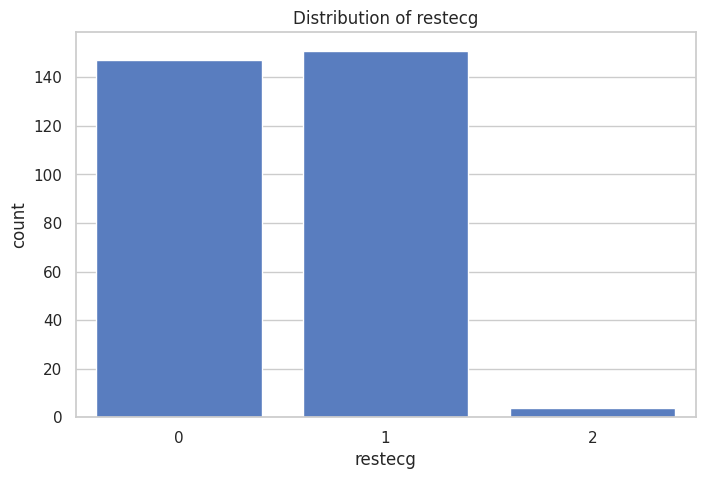

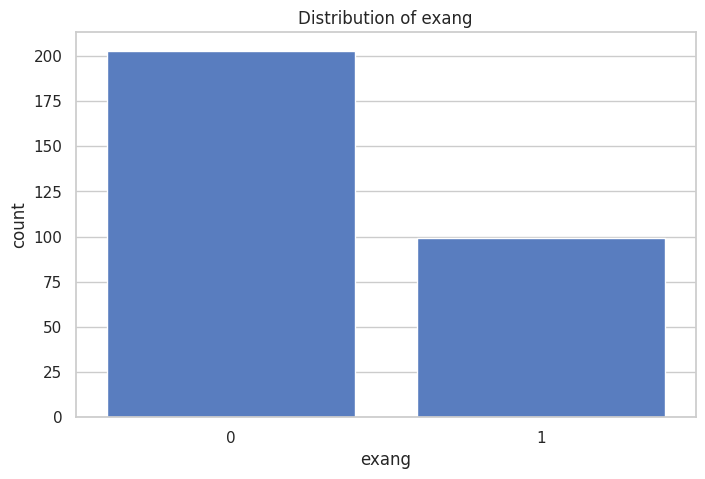

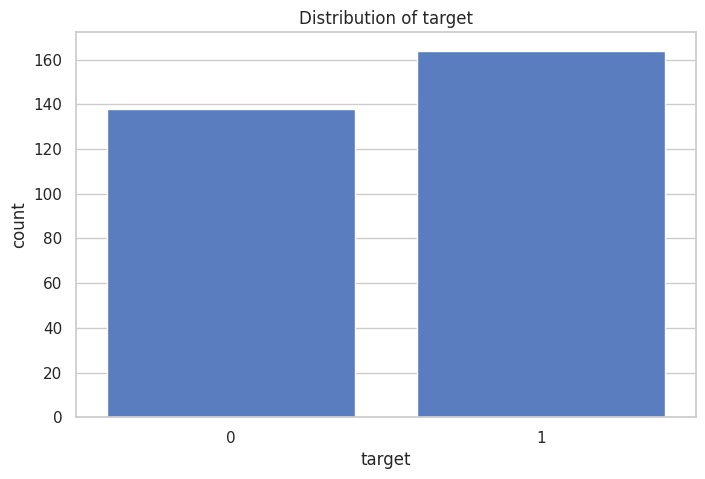

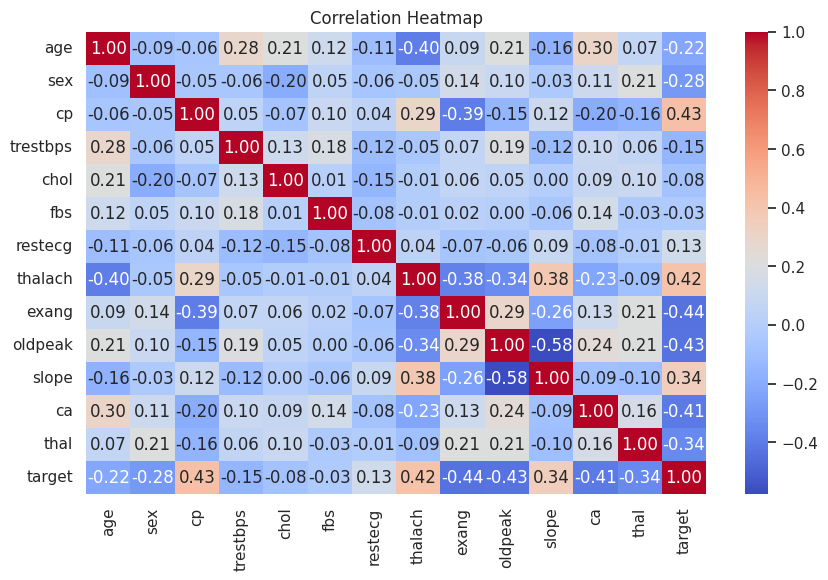

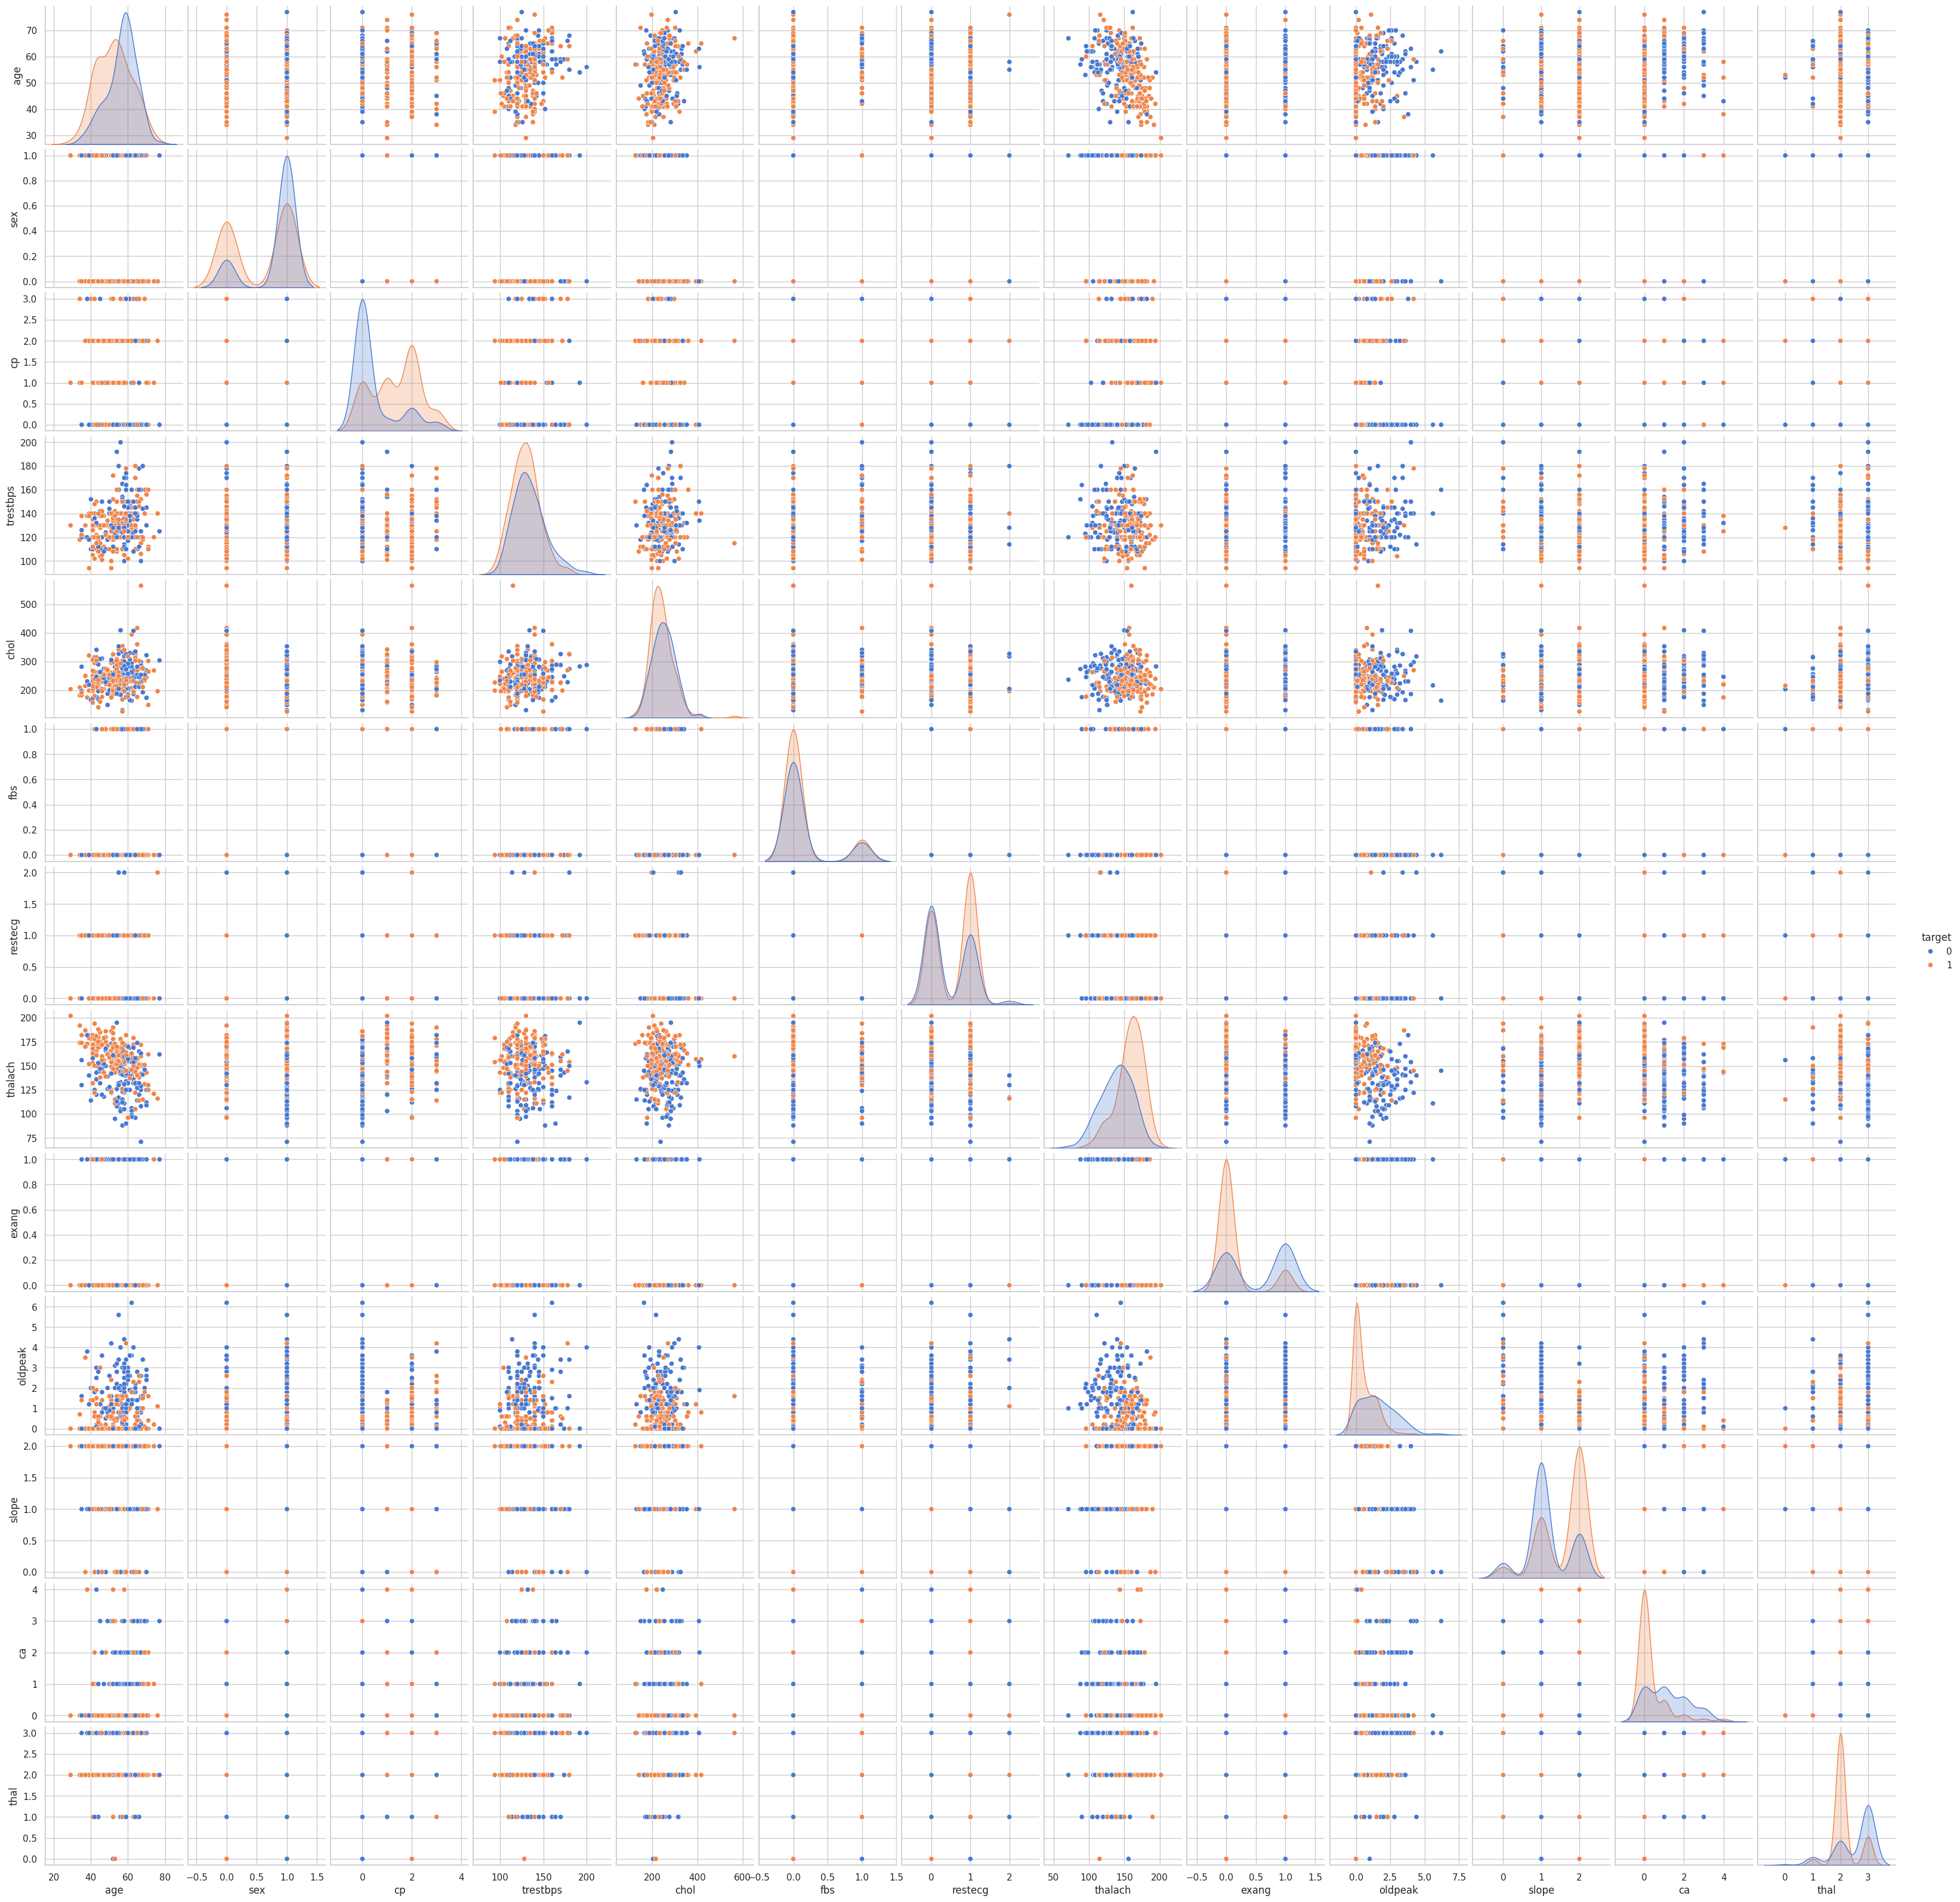


EDA Insights Summary:
---------------------
1. The dataset has a balanced mix of numerical and categorical attributes.
2. No major missing values detected (if true).
3. Some features (e.g., age, cholesterol, max heart rate) show outliers.
4. Target variable appears moderately balanced.
5. Correlation heatmap shows strong relationships between certain variables (e.g., cp and target).
6. These insights will guide feature selection and normalization in future modeling stages.



In [3]:
# =============================================
# Deliverable 1: Data Collection, Cleaning, and Exploration
# Dataset: Heart Disease UCI
# =============================================

# ---- 1. Import Libraries ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (8, 5)

# ---- 2. Load Dataset ----
# You can download from Kaggle or UCI and save locally as 'heart.csv'
df = pd.read_csv('heart.csv')

# ---- 3. Inspect Dataset ----
print("Shape of dataset:", df.shape)
print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe())

print("\n--- First 5 Rows ---")
display(df.head())

# ---- 4. Data Cleaning ----

# 4.1 Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 4.2 Handle missing values (if any)
# Example: df['column_name'].fillna(df['column_name'].median(), inplace=True)

# 4.3 Remove duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")

# 4.4 Check for inconsistent or incorrect values
print("\nUnique values in categorical columns:")
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang']:
    print(f"{col}: {df[col].unique()}")

# Convert categorical encodings if necessary
# Example: df['sex'] = df['sex'].map({0: 'female', 1: 'male'})

# ---- 5. Detect and Handle Outliers ----
# Visualize distributions to identify outliers
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Optional: Handle outliers (e.g., using IQR)
# Q1 = df[col].quantile(0.25)
# Q3 = df[col].quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

# ---- 6. Exploratory Data Analysis (EDA) ----

# 6.1 Distribution of key numerical features
for col in num_cols:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# 6.2 Categorical feature distributions
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# 6.3 Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 6.4 Relationship between features and target
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

# ---- 7. Insights Summary ----

print("""
EDA Insights Summary:
---------------------
1. The dataset has a balanced mix of numerical and categorical attributes.
2. No major missing values detected (if true).
3. Some features (e.g., age, cholesterol, max heart rate) show outliers.
4. Target variable appears moderately balanced.
5. Correlation heatmap shows strong relationships between certain variables (e.g., cp and target).
6. These insights will guide feature selection and normalization in future modeling stages.
""")
